# OpenStreetMap Overpass API in Python

by Michael T. Moen

**OpenStreetMap (OSM):** https://www.openstreetmap.org/

**OSM Overpass API Documentation:** https://wiki.openstreetmap.org/wiki/Overpass_API

**OSM License:** https://www.openstreetmap.org/copyright

The OpenStreetMap API is licensed the [Open Data Commons Open Database License](https://opendatacommons.org/licenses/odbl/), which allows users to share, create, and adapt the database as long OpenStreetMap is attributed and the data is kept open.

<br>

This tutorial uses the OSMnx Python package to access the OpenStreetMap API. The examples used in this tutorial are inspired by those found in the official OSMnx Examples Gallery.

**OSMnx Documentation:** https://osmnx.readthedocs.io/en/stable/

**OSMnx Examples Gallery:** https://github.com/gboeing/osmnx-examples/tree/main

**OSMnx License:** https://github.com/gboeing/osmnx/blob/main/LICENSE.txt

If you use OSMnx in your work, please cite the journal article:

Boeing, G. 2017. "OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks." Computers, Environment and Urban Systems 65, 126-139.

<br>

For more information on the usage limitations of this service, please see the [Nominatim Usage Policy](https://operations.osmfoundation.org/policies/nominatim/) and the [Overpass Commons documentation](https://dev.overpass-api.de/overpass-doc/en/preface/commons.html). Please ensure that if you use an alternative Nominatim or Overpass instance, you obey their usage policies.

*These recipe examples were tested on April 1, 2024.*

## Import Libraries

This tutorial uses the following libraries:

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

## 1. Retrieve and Download Feature and Boundary Data

The OSMnx contains several options for retrieving GIS data associated with locations, including:
- `geocode_to_gdf`
- `features_from_address`
- `features_from_bbox`
- `features_from_place`
- `features_from_point`
- `features_from_polygon`
- `features_from_xml`

These methods return GeoDataFrames that can be used to work with GIS data in Python or exported and saved as other formats.

### Using `geocode_to_gdf` to Download Boundary Data

This example uses the `geocode_to_gdf` method to retrieve the boundary data for the given query. This method returns a GeoDataFrame with a row for each query given. Note that the `geocode_to_gdf` method can also take a list of queries as an argument. In this case, the returned GeoDataFrame has a row for each query. An example of this is given later in this tutorial.

For more information on how you can use the `geocode_to_gdf` method, please see the [OSMnx User Reference](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.geocoder.geocode_to_gdf).

In [2]:
place = 'Alabama, USA'
alabama_gdf = ox.geocode_to_gdf(place)

# Display GeoDataFrame
alabama_gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-88.47310 31.89390, -88.47264 31.875...",35.008112,30.143376,-84.888289,-88.473101,224705,relation,161950,33.258882,-86.829534,boundary,administrative,8,0.719961,state,Alabama,"Alabama, United States"


By default, GeoPandas saves data as an ESRI Shapefile. This can also be explicitly defined by setting the driver to `ESRI Shapefile`:

In [3]:
# Save the files to a folder called 'alabama-shapefile'
alabama_gdf.to_file('alabama-shapefile')

# This does the same thing
alabama_gdf.to_file('alabama-shapefile', driver='ESRI Shapefile')

/tmp/ipykernel_8900/592623201.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  alabama_gdf.to_file('alabama-shapefile')
/tmp/ipykernel_8900/592623201.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  alabama_gdf.to_file('alabama-shapefile', driver='ESRI Shapefile')


The data can also be saved as GeoJSON by setting the driver to `GeoJSON`:

In [4]:
alabama_gdf.to_file('alabama.json', driver='GeoJSON')

We can also save the data as a GeoPackage file by setting the driver to `GPKG`:

In [5]:
alabama_gdf.to_file('alabama.gpkg', driver='GPKG')

### Using `features_from_address` to Get Building Data

The `features_from_address` method takes three arguments:
- `address` is a string containing the address of the location of interest. This example uses the address of The University of Alabama.
- `tags` is a dictionary of map elements of interest in the given area. To see what elements can be queried, please see the [OpenStreetMap Wiki](https://wiki.openstreetmap.org/wiki/Map_features). This example retrieves buildings of all types by using the `True` value for the `building` key.
- `dist` (optional) is the distance in meters from the address that is searched. By default, this value is set to 1000.

For more information on how you can use the `features_from_address` method, please see the [OSMnx User Reference](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.features.features_from_address).

In [6]:
address = '425 Stadium Dr, Tuscaloosa, AL 35401, United States'
tags = {
    'building': True
}
gdf = ox.features_from_address(address, tags, dist=500)

# Display GeoPandas DataFrame
gdf.head()

geometry  \
element_type osmid                                                          
way          120485565  POLYGON ((-87.55040 33.21352, -87.55031 33.213...   
             120485567  POLYGON ((-87.55069 33.21220, -87.55059 33.212...   
             120485569  POLYGON ((-87.55318 33.21223, -87.55324 33.211...   
             124127809  POLYGON ((-87.55249 33.21083, -87.55246 33.211...   
             124280591  POLYGON ((-87.55258 33.21171, -87.55255 33.211...   

                       wheelchair  amenity  \
element_type osmid                           
way          120485565        NaN  parking   
             120485567        NaN  parking   
             120485569        yes      NaN   
             124127809        NaN      NaN   
             124280591        NaN      NaN   

                                                                    nodes  \
element_type osmid                                                          
way          120485565  [1350925632, 9262756068, 1350925631, 135092562...   
             120485567  [1350925624, 1437999814, 1350925628, 135092562...   
             120485569  [1350925625, 1350925621, 1350925622, 135092562...   
             124127809  [1382356520, 1382356534, 1382356535, 138235657...   
             124280591  [1383629484, 1383629482, 1383629478, 138362948...   

                       capacity                         name wikidata  \
element_type osmid                                                      
way          120485565      NaN  North ten Hoor Parking Deck      NaN   
             120485567      NaN  South ten Hoor Parking Deck      NaN   
             120485569      NaN                       Publix      NaN   
             124127809      NaN     University Town Center B      NaN   
             124280591      NaN                          NaN      NaN   

                       wikipedia building       parking  ... tower:type  \
element_type osmid                                       ...              
way          120485565       NaN      yes  multi-storey  ...        NaN   
             120485567       NaN      yes  multi-storey  ...        NaN   
             120485569       NaN      yes           NaN  ...        NaN   
             124127809       NaN      yes           NaN  ...        NaN   
             124280591       NaN      yes           NaN  ...        NaN   

                       short_name tourism layer source addr:country  \
element_type osmid                                                    
way          120485565        NaN     NaN   NaN    NaN          NaN   
             120485567        NaN     NaN   NaN    NaN          NaN   
             120485569        NaN     NaN   NaN    NaN          NaN   
             124127809        NaN     NaN   NaN    NaN          NaN   
             124280591        NaN     NaN   NaN    NaN          NaN   

                       name:etymology:wikidata shelter_type ways type  
element_type osmid                                                     
way          120485565                     NaN          NaN  NaN  NaN  
             120485567                     NaN          NaN  NaN  NaN  
             120485569                     NaN          NaN  NaN  NaN  
             124127809                     NaN          NaN  NaN  NaN  
             124280591                     NaN          NaN  NaN  NaN  

[5 rows x 47 columns]

### Using `features_from_bbox` to Get Street Features

The `features_from_bbox` method takes two arguments:
- `bbox` is tuple of floats describing the boundaries of an area of interest. This tuple must be structured as `(north, south, east, west)`. This example looks at the area around St. Louis, MO.
- `tags` is a dictionary of map elements of interest in the given area. To see what elements can be queried, please see the [OpenStreetMap Wiki](https://wiki.openstreetmap.org/wiki/Map_features). This example retrieves the five largest classifications of `highway` as defined by OpenStreetMap.

For more information on how you can use the `features_from_bbox` method, please see the [OSMnx User Reference](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.features.features_from_bbox).

In [7]:
north = 39.3
south = 38.1
east = -89.6
west = -91.1
bbox = (north, south, east, west)
tags = {
    'highway': ['motorway', 'trunk', 'primary', 'secondary', 'tertiary']
}
gdf = ox.features_from_bbox(bbox=bbox, tags=tags)

Now we can graph the features above, which will be explored further in the next section.

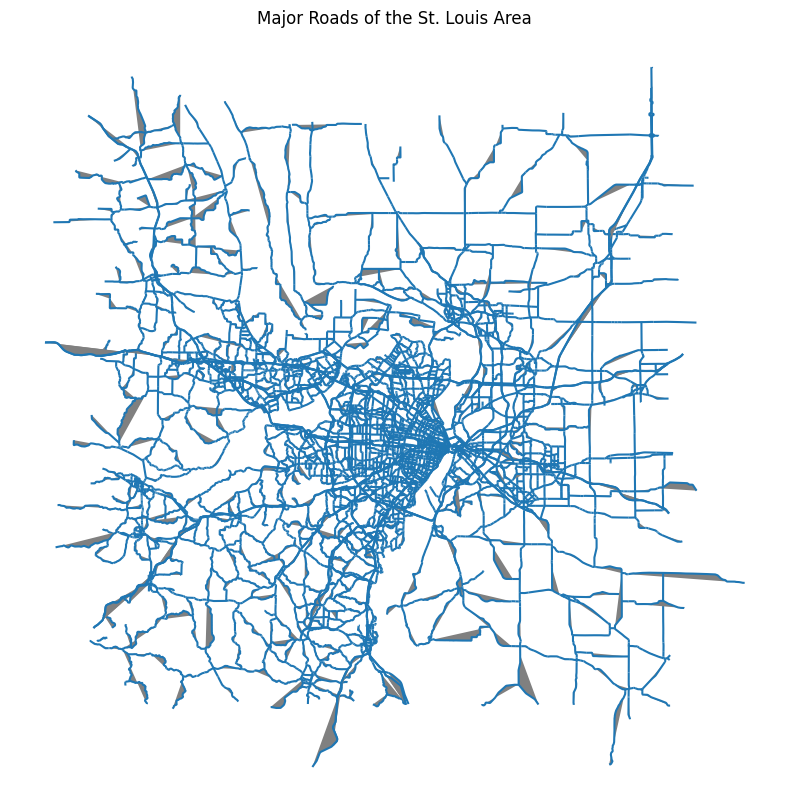

In [8]:
ax = gdf.plot(fc='gray', figsize=(10, 10))
ax.axis('off')
ax.set_title('Major Roads of the St. Louis Area')
plt.show()

## 2. Graphing with GeoPandas

GeoPandas allows for data to be printed using the `plot()` function:

<Axes: >

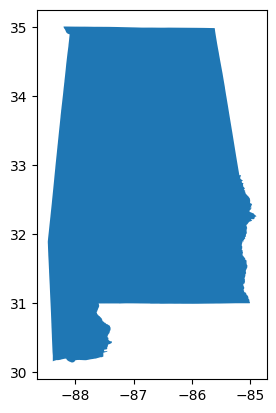

In [9]:
alabama_gdf.plot()

By default, GeoPandas includes latitude and longitude as the axes of the figure. This can be turned off by specifying `.axis('off')`. Additionally, we can suppress the output of metadata, like `<Axes: >` in the example above, by adding a semicolon `;` to the end of the line.

Additionally, we can modify the color of the figure with `plot()`'s fill color `fc` parameter. The `figsize` parameter can also be set with a tuple containing `(width, height)`. Note that aspect ratio of image is maintained, and only the more restrictive number between `width` and `height` is used for the graph.

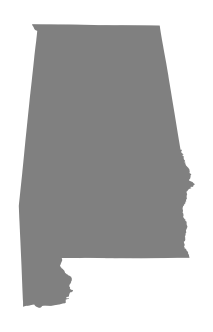

In [10]:
alabama_gdf.plot(fc='gray', figsize=(2.5, 5)).axis('off');

### Mapping the Buildings of The University of Alabama

OpenStreetMap contains building footprint data, allowing for individual building to be plotted.

In this example, the `features_from_place` method is used to retrieve the data for all buildings at The University of Alabama.

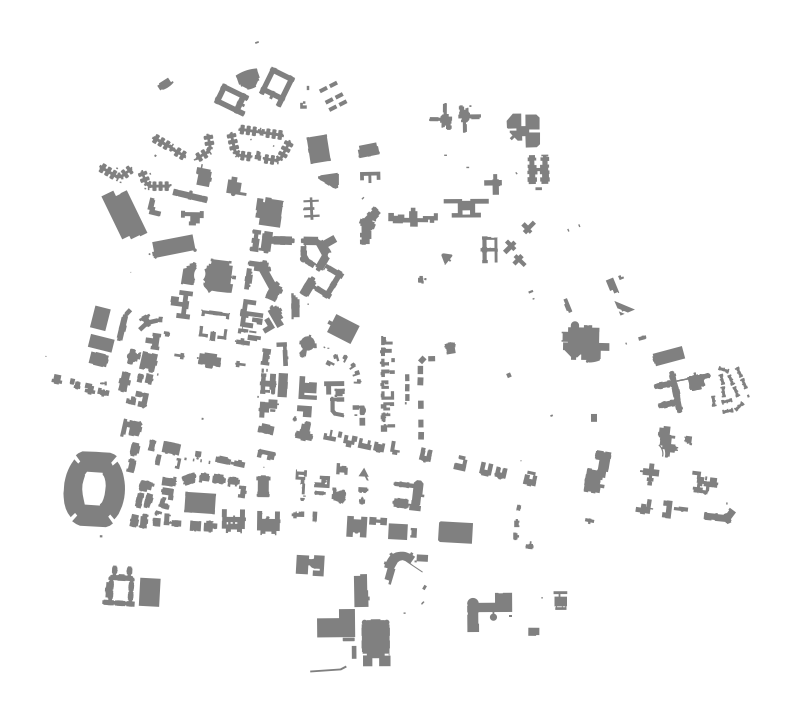

In [11]:
place = 'University of Alabama, AL USA'
tags = {
    'building': True
}
buildings = ox.features_from_place(place, tags)
buildings.plot(fc='gray', figsize=(10, 10)).axis('off');

We can use the metadata of the buildings to color them according to their purpose. The unique tags that we must consider are given below:

In [12]:
buildings['building'].unique()

array(['yes', 'university', 'sports_centre', 'dormitory', 'school',
       'hotel', 'parking', 'residential', 'commercial', 'service',
       'college', 'apartments', 'house', 'shed', 'stadium', 'roof',
       'church', 'grandstand', 'yes;dormitory'], dtype=object)

Now, we can construct a dictionary assigning a color to each building type:

In [13]:
education_color = 'royalblue'
sports_color = 'tomato'
housing_color = 'forestgreen'
religious_color = 'darkmagenta'
services_color = 'sienna'
other_color = 'dimgray'
undefined_color = 'lightgray'

colors = {
    'university': education_color,
    'college': education_color,
    'school': education_color,

    'dormitory': housing_color,
    'hotel': housing_color,
    'residential': housing_color,
    'apartments': housing_color,
    'house': housing_color,
    'yes;dormitory': housing_color,

    'stadium': sports_color,
    'sports_centre': sports_color,
    'grandstand': sports_color,

    'church': religious_color,

    'service': services_color,
    'parking': services_color,

    'commercial': other_color,
    'roof': other_color,
    'shed': other_color,

    'yes': undefined_color,
}

Now, we can plot the buildings using the colors determined above.

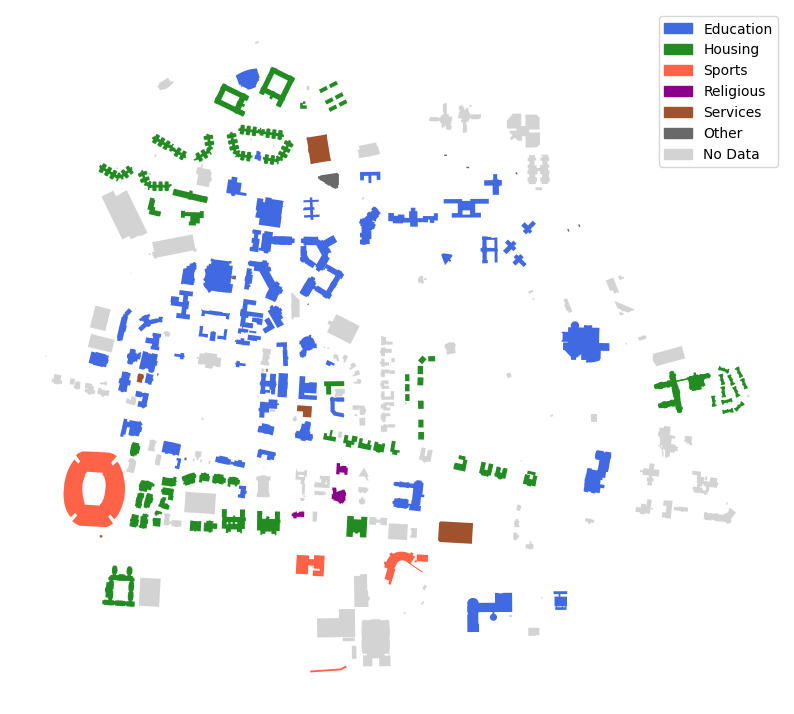

In [14]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))

# Plot each building type with the appropriate color
for type in buildings['building'].unique():
    color = colors[type]
    buildings[buildings['building'] == type].plot(ax=ax, color=color)

ax.axis('off')

# Create legend
legend_handles = [
    mpatches.Patch(color=education_color, label='Education'),
    mpatches.Patch(color=housing_color, label='Housing'),
    mpatches.Patch(color=sports_color, label='Sports'),
    mpatches.Patch(color=religious_color, label='Religious'),
    mpatches.Patch(color=services_color, label='Services'),
    mpatches.Patch(color=other_color, label='Other'),
    mpatches.Patch(color=undefined_color, label='No Data'),
]
ax.legend(handles=legend_handles)

plt.show();

### Applying a Projection on a Map

As mentioned above, the `geocode_to_gdf` function can take a list of places to look up as an argument. Doing so returns a single GeoDataFrame that contains the data for all of the locations. Note that each state queried is represented by a row in the GeoDataFrame.

The example below looks at the states designated as part of the South by the U.S. Census Bureau.

In [15]:
places = [
    'Alabama, USA', 'Mississippi, USA', 'Louisiana, USA',
    'Arkansas, USA', 'Tennessee, USA', 'Florida, USA',
    'Georgia, USA', 'South Carolina, USA', 'North Carolina, USA',
    'Kentucky, USA', 'Texas, USA', 'Oklahoma, USA',
    'Virginia, USA', 'West Virginia, USA', 'Maryland, USA',
    'District of Columbia, USA', 'Delaware, USA'
]
southern_states = ox.geocode_to_gdf(places)

# Display the top rows of the GeoPandas DataFrame
southern_states.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-88.47310 31.89390, -88.47264 31.875...",35.008112,30.143376,-84.888289,-88.473101,224705,relation,161950,33.258882,-86.829534,boundary,administrative,8,0.719961,state,Alabama,"Alabama, United States"
1,"POLYGON ((-91.65501 31.25178, -91.65491 31.250...",34.996017,30.143677,-88.097795,-91.655009,321173572,relation,161943,32.971528,-89.734850,boundary,administrative,8,0.700392,state,Mississippi,"Mississippi, United States"
2,"POLYGON ((-94.04319 32.62108, -94.04309 32.592...",33.019594,28.854289,-88.758331,-94.043187,293608976,relation,224922,30.870388,-92.007126,boundary,administrative,8,0.713185,state,Louisiana,"Louisiana, United States"
3,"POLYGON ((-94.61788 36.49950, -94.61772 36.498...",36.499600,33.004246,-89.644395,-94.617875,321523471,relation,161646,35.204888,-92.447911,boundary,administrative,8,0.704692,state,Arkansas,"Arkansas, United States"
4,"POLYGON ((-90.31030 35.00429, -90.31008 35.001...",36.678118,34.982938,-81.647219,-90.310298,327458731,relation,161838,35.773008,-86.282008,boundary,administrative,8,0.720268,state,Tennessee,"Tennessee, United States"


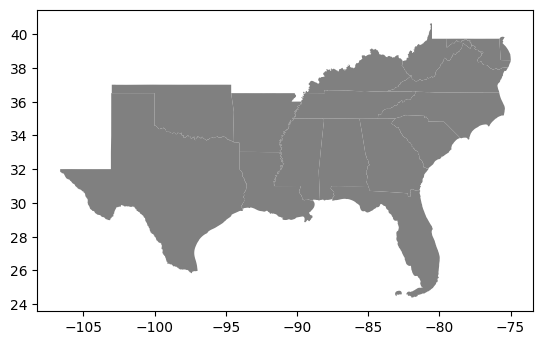

In [16]:
southern_states.plot(fc='gray');

The `project_gdf` method allows us to project a GeoDataFrame to a coordinate reference system (CRS). By default, OSMnx uses UTM projection centered on your data, so please note that distance measurements may be inaccurate for areas over 620 mi (1000 km) wide. However, this can be modified by setting the `to_crs` tag with a string or a CRS object from [pyproj](https://pyproj4.github.io/pyproj/stable/).

If you would like to learn more about UTM zones, please see this [article from GISGeography.com](https://gisgeography.com/utm-universal-transverse-mercator-projection/). For more information on how you can use the `project_gdf` method, please see the [OSMnx User Reference](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.projection.project_gdf).

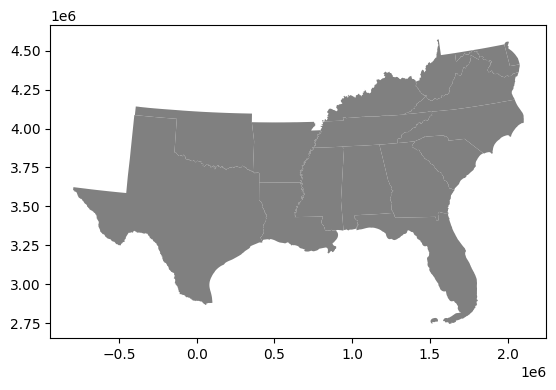

In [17]:
projected_southern_states = ox.project_gdf(southern_states)
projected_southern_states.plot(fc='gray');

Since the projection above uses a UTM zone, the origin of the graph is where the central meridian intersects the equator. Additionally, the values on the axes are in millions of meters (or thousands of kilometers), so the distance from central Texas to central Louisiana is approximately 500 km.

## 3. Street Networks

The street data for a location can be retrieved with the following methods:
- `graph_from_address`
- `graph_from_bbox`
- `graph_from_place`
- `graph_from_point`
- `graph_from_polygon`
- `graph_from_xml`

The examples below all use the `graph_from_place` method.

### Plotting Street Networks

The `graph_from_place` method can be used to generate a variety of street networks by setting the `network_type`:
- `drive`
- `bike`
- `walk`
- `drive_service`
- `all`
- `all_private`

For more information on how you can use the `graph_from_place` method, please see the [OSMnx User Reference](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.graph).

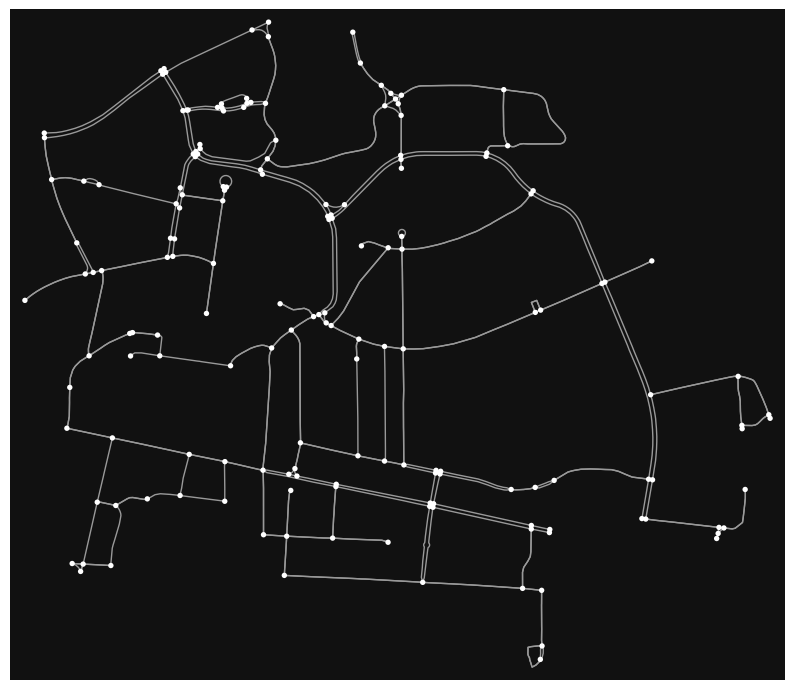

In [22]:
drive_graph = ox.graph_from_place('University of Alabama, Tuscaloosa, AL, USA', network_type='drive')
ox.plot_graph(drive_graph, figsize=(10, 10));

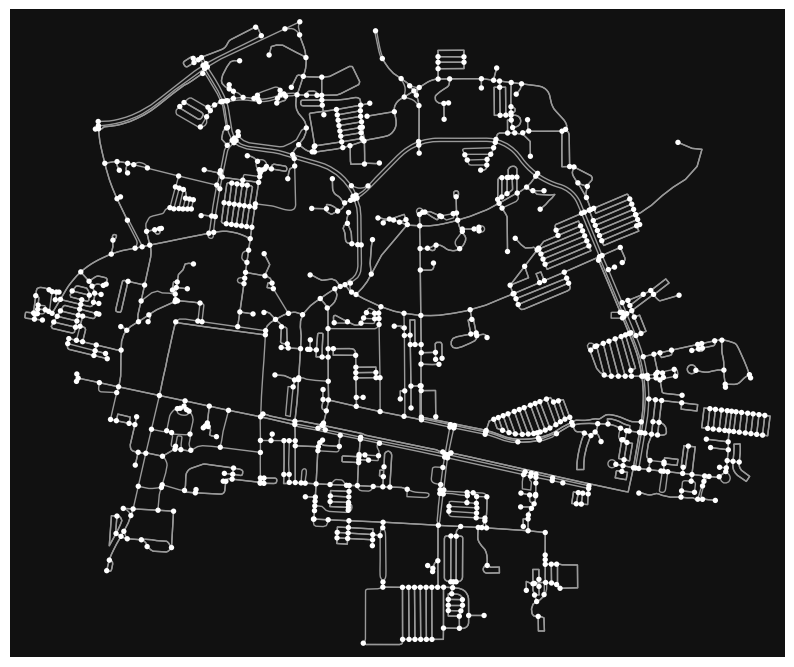

In [19]:
bike_graph = ox.graph_from_place('University of Alabama, Tuscaloosa, AL, USA', network_type='bike')
ox.plot_graph(bike_graph, figsize=(10, 10));

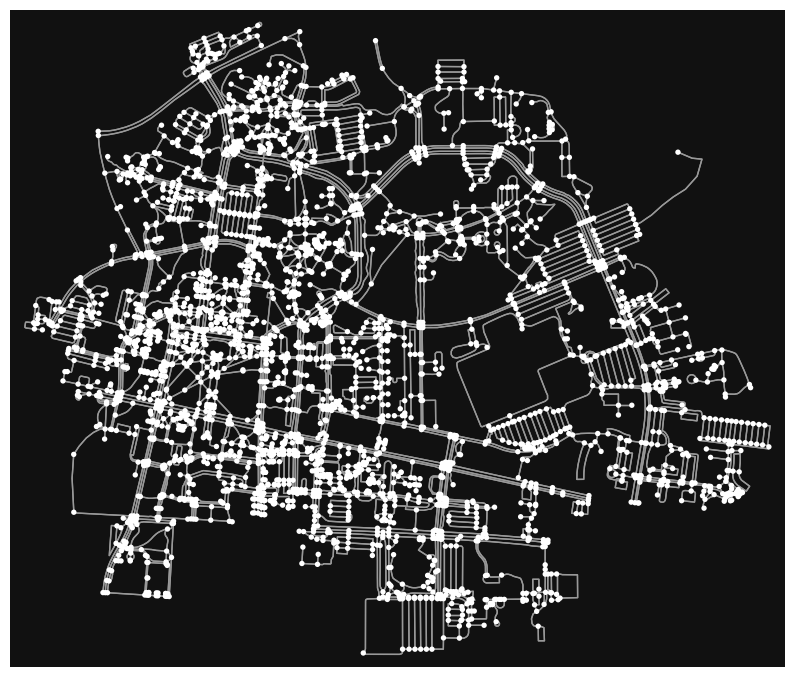

In [23]:
walk_graph = ox.graph_from_place('University of Alabama, Tuscaloosa, AL, USA', network_type='walk')
ox.plot_graph(walk_graph, figsize=(10, 10));

### Finding the Shortest Route Between Two Nodes

Now that we have created street networks, we can use the `shortest_path` method to find the shortest path between two nodes.

Note that in order to use this method, the `scikit-learn` Python library must be installed.

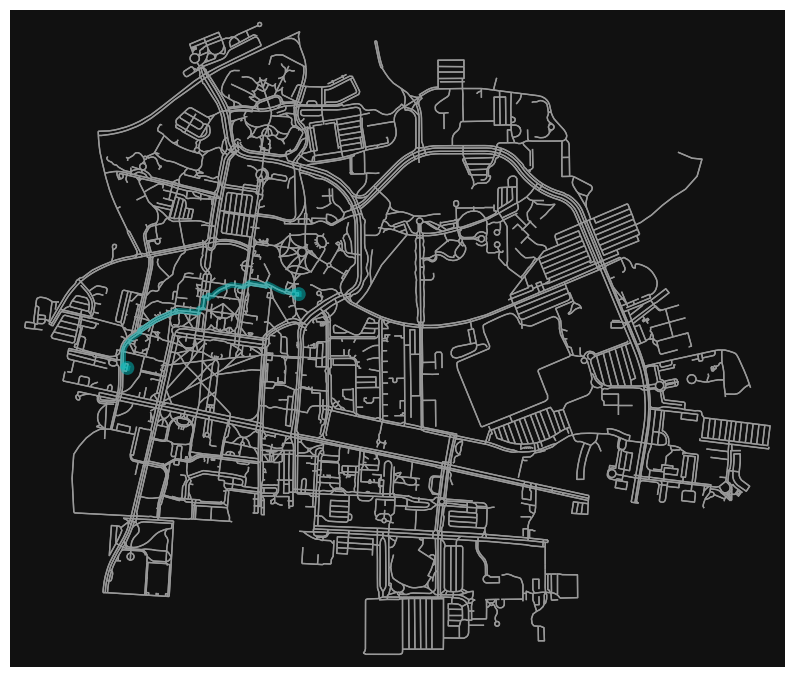

In [24]:
origin = (33.211078599884964, -87.54927369336447)       # Coordinates of the Angelo Bruno Business Library
destination = (33.21344833663583, -87.54291076951604)   # Coordinates of the Rodgers Library

# Find the nodes nearest to each set of coordinates
origin_node = ox.distance.nearest_nodes(walk_graph, origin[1], origin[0])
destination_node = ox.distance.nearest_nodes(walk_graph, destination[1], destination[0])

# Find the shortest path and graph it
route = ox.shortest_path(walk_graph, origin_node, destination_node)
fig, ax = ox.plot_graph_route(walk_graph, route, route_color='c', node_size=0, figsize=(10, 10))

Using the `route_to_gdf` method, we can also find the distance of this route.

In [34]:
length = int(sum(ox.utils_graph.route_to_gdf(walk_graph, route, "length")["length"]))
print(f'The route is {length} meters.')

The route is 850 meters.
